In [ ]:
# Imports
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [4]:
# Load the CSV file
file_path = "./src/tmdb_5000_movies.csv"
movies_df = pd.read_csv(file_path)

In [5]:
# Function to extract list of genre names from JSON-like strings in 'genres' column
def extract_genres(genre_list_str):
    try:
        # Convert the string to a list of dictionaries
        genres = ast.literal_eval(genre_list_str)
        # Extract the 'name' of each genre
        genre_names = [genre["name"] for genre in genres]
        return ", ".join(genre_names)
    except:
        return None


# Function to extract company names from 'production_companies' column
def extract_companies(companies_list_str):
    try:
        # Convert the string to a list of dictionaries
        companies = ast.literal_eval(companies_list_str)
        # Extract the 'name' of each company
        company_names = [company["name"] for company in companies]
        return ", ".join(company_names)
    except:
        return None


# Apply the extraction functions to the relevant columns
movies_df["genres"] = movies_df["genres"].apply(extract_genres)
movies_df["production_companies"] = movies_df["production_companies"].apply(
    extract_companies
)

# Display the updated dataframe with genres and production companies cleaned
# print(
#     movies_df[
#         [
#             "title",
#             "genres",
#             "production_companies",
#             "budget",
#             "revenue",
#             "popularity",
#             "vote_average",
#         ]
#     ].head()
# )

In [6]:
# Configuring Seaborn style
sns.set(style="whitegrid")

# Convert release_date to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Drop rows with missing budget or revenue data (for correlation analysis)
movies_clean_df = movies_df.dropna(subset=['budget', 'revenue'])

# Filter out zero budget or zero revenue
movies_clean_df = movies_clean_df[(movies_clean_df['budget'] > 0) & (movies_clean_df['revenue'] > 0)]

C:\Users\klock\AppData\Local\Temp\ipykernel_86464\3786155408.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="viridis")


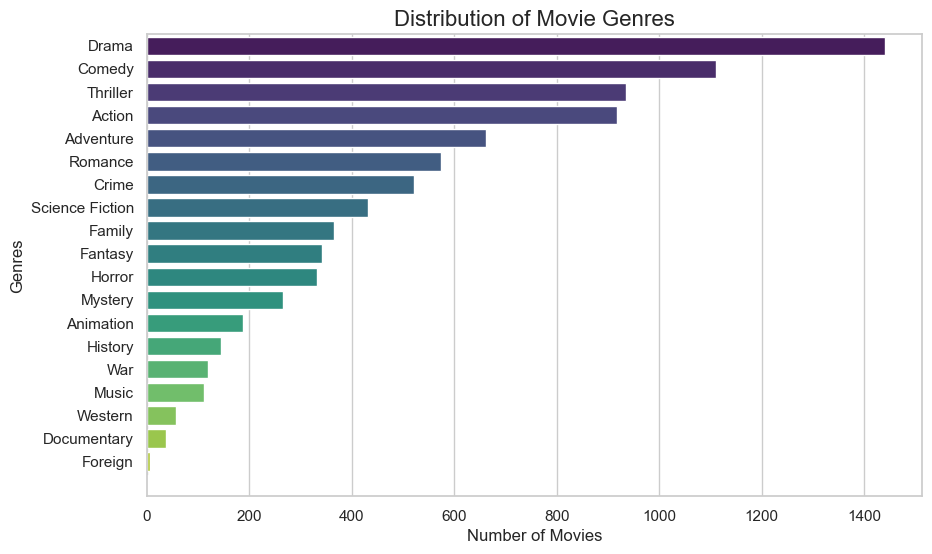

In [7]:
# 1. Distribution of Genres
genres_exploded = movies_clean_df['genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genre_counts = genres_exploded.value_counts()

# Plot the genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="viridis")
plt.title("Distribution of Movie Genres", fontsize=16)
plt.ylabel("Genres")
plt.xlabel("Number of Movies")
plt.show()

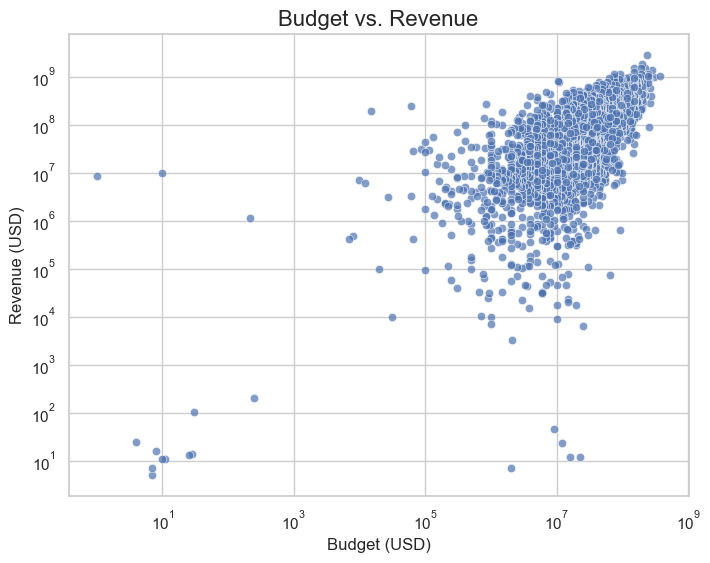

In [8]:

# 2. Budget vs. Revenue correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=movies_clean_df, alpha=0.7)
plt.title("Budget vs. Revenue", fontsize=16)
plt.xlabel("Budget (USD)")
plt.ylabel("Revenue (USD)")
plt.xscale('log')
plt.yscale('log')
plt.show()

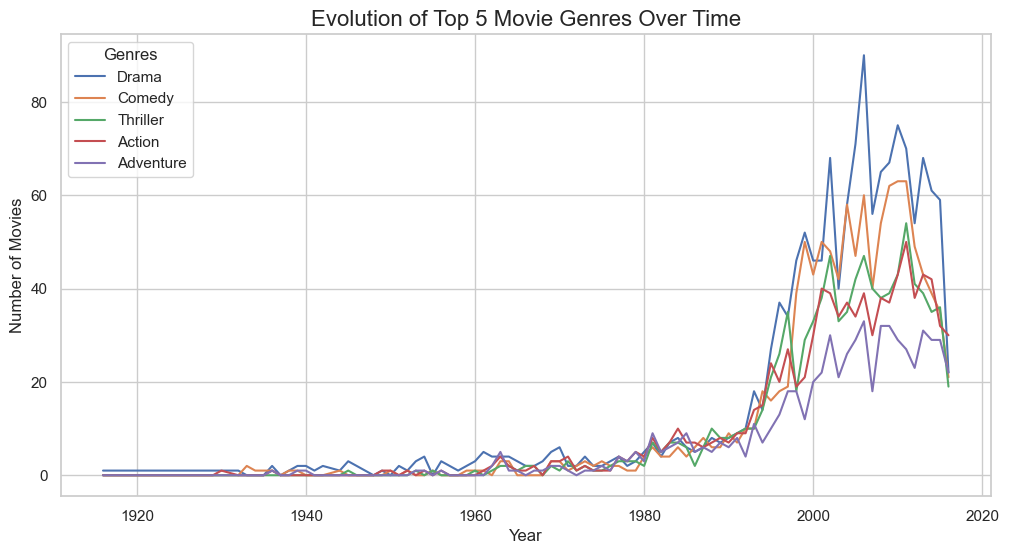

In [9]:
# 3. Evolution of genres over time (trend analysis)
movies_clean_df['year'] = movies_clean_df['release_date'].dt.year
genres_by_year = genres_exploded.groupby(movies_clean_df['year']).value_counts().unstack().fillna(0)

# Plot the evolution of top genres
top_genres = genre_counts.index[:5]  # Select top 5 genres
plt.figure(figsize=(12, 6))
for genre in top_genres:
    plt.plot(genres_by_year.index, genres_by_year[genre], label=genre)

plt.title("Evolution of Top 5 Movie Genres Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genres")
plt.show()

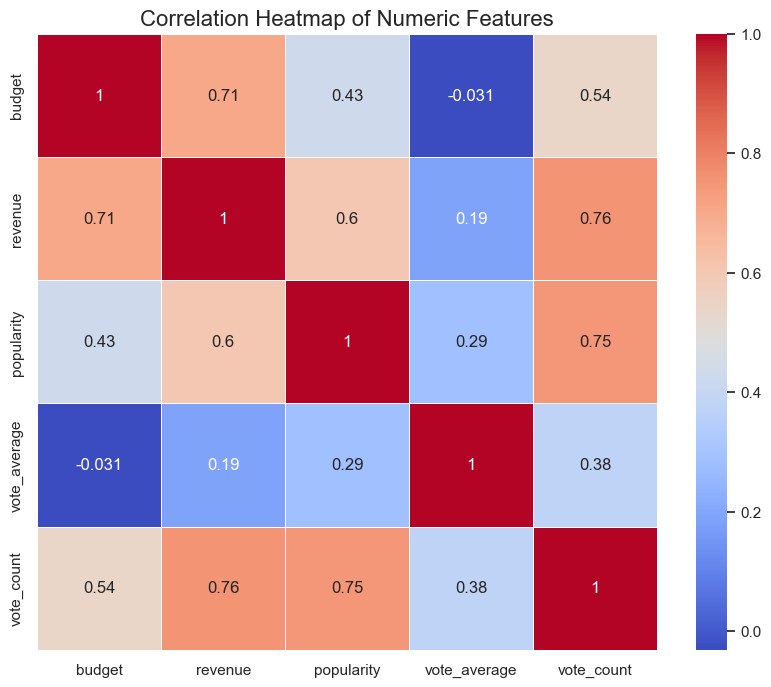

In [10]:
# 4. Correlation heatmap between numeric variables
plt.figure(figsize=(10, 8))
corr_matrix = movies_clean_df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

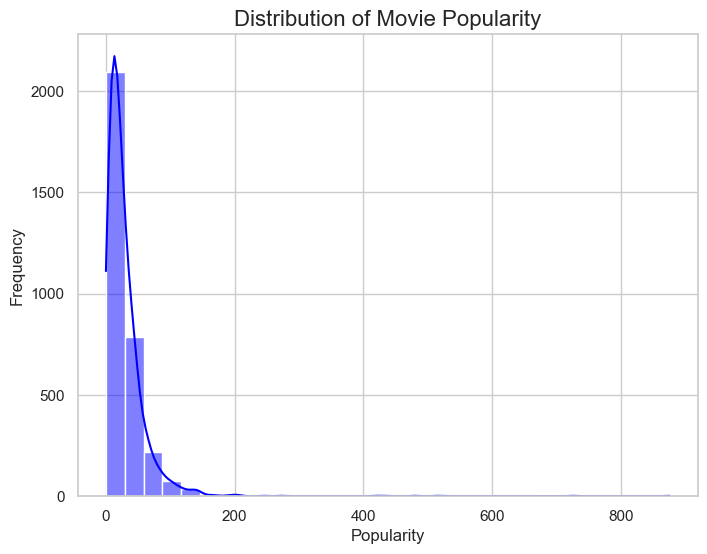

In [11]:
# 5. Distribution of Popularity
plt.figure(figsize=(8, 6))
sns.histplot(movies_clean_df['popularity'], bins=30, kde=True, color='blue')
plt.title("Distribution of Movie Popularity", fontsize=16)
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

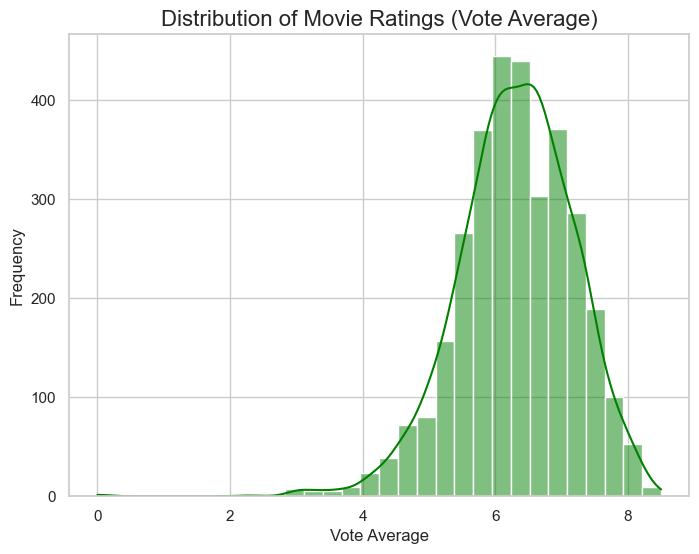

In [12]:
# 6. Distribution of Vote Average (Movie Ratings)
plt.figure(figsize=(8, 6))
sns.histplot(movies_clean_df['vote_average'], bins=30, kde=True, color='green')
plt.title("Distribution of Movie Ratings (Vote Average)", fontsize=16)
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.show()

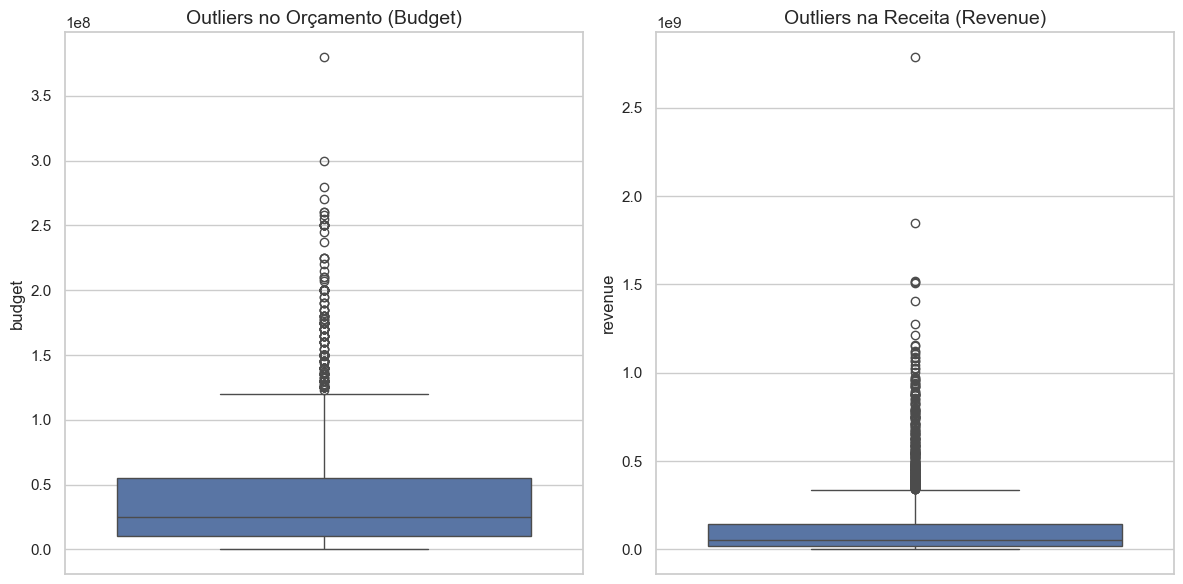

In [ ]:
# 6. Analysing budget and revenue outliers 

plt.figure(figsize=(12, 6))

# Boxplotiing for budget
plt.subplot(1, 2, 1)
sns.boxplot(y=movies_clean_df['budget'])
plt.title("Outliers no Orçamento (Budget)", fontsize=14)

# Boxplotiing for revenue
plt.subplot(1, 2, 2)
sns.boxplot(y=movies_clean_df['revenue'])
plt.title("Outliers na Receita (Revenue)", fontsize=14)

plt.tight_layout()
plt.show()

In [17]:
# Drop rows with missing budget, revenue, vote_average, or popularity
movies_clean_df = movies_df.dropna(subset=['budget', 'revenue', 'vote_average', 'popularity'])

# Filter out zero budget, zero revenue, or zero popularity
movies_clean_df = movies_clean_df[
    (movies_clean_df['budget'] > 0) & 
    (movies_clean_df['revenue'] > 0) & 
    (movies_clean_df['popularity'] > 0)
]

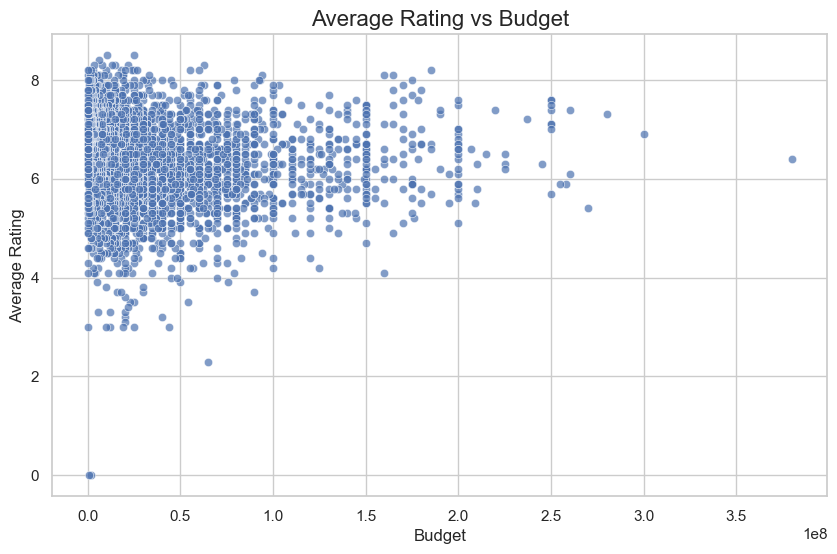

In [18]:
# 6. Scatter plot of vote_agerage X budget
# Create a scatter plot of average rating (vote_average) vs. budget
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_clean_df, x='budget', y='vote_average', alpha=0.7)
plt.title('Average Rating vs Budget', fontsize=16)
plt.xlabel('Budget')
plt.ylabel('Average Rating')
plt.show()

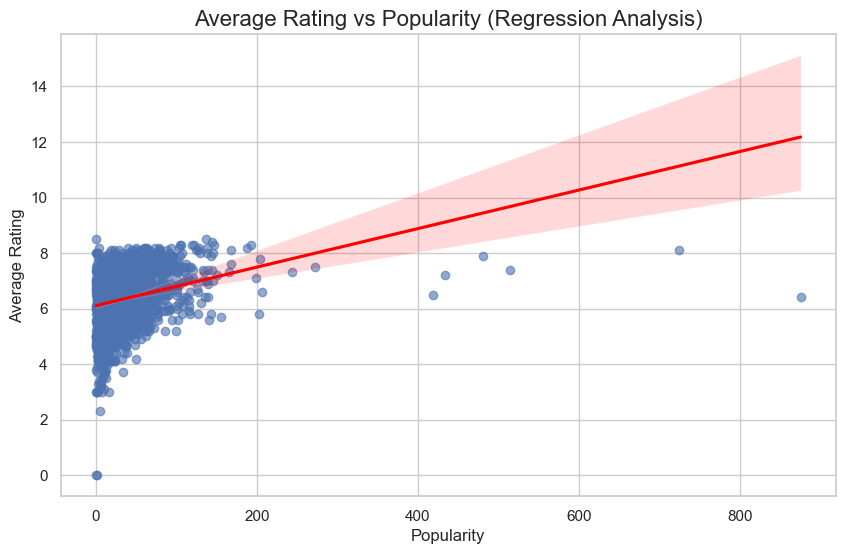

In [19]:
# Analyze the relationship between average rating and popularity (indicating how many people watched a movie)
# We'll use a regression plot to check for any trend

plt.figure(figsize=(10, 6))
sns.regplot(data=movies_clean_df, x='popularity', y='vote_average', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Average Rating vs Popularity (Regression Analysis)', fontsize=16)
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.show()

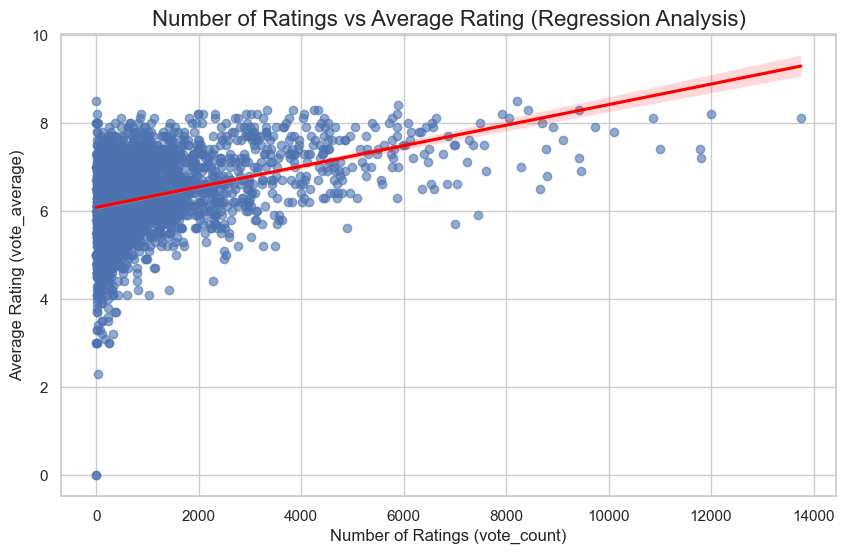

In [21]:
# Analyze the relationship between the number of ratings (vote_count) and their average rating (vote_average)

# Drop rows with missing vote_count or vote_average
movies_clean_df = movies_clean_df.dropna(subset=['vote_count', 'vote_average'])

# Create a scatter plot with regression to observe the trend
plt.figure(figsize=(10, 6))
sns.regplot(data=movies_clean_df, x='vote_count', y='vote_average', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Number of Ratings vs Average Rating (Regression Analysis)', fontsize=16)
plt.xlabel('Number of Ratings (vote_count)')
plt.ylabel('Average Rating (vote_average)')
plt.show()

In [23]:
# Calculate the residuals (difference between actual average rating and predicted rating based on the regression line)

# Prepare data for linear regression
X = movies_clean_df['vote_count'].values.reshape(-1, 1)
y = movies_clean_df['vote_average'].values

# Fit a simple linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Predict the average ratings based on the vote_count
predicted_ratings = reg_model.predict(X)

# Calculate residuals
residuals = y - predicted_ratings

# Define "outliers" as movies with a significant deviation from the trend (residual > 1)
outlier_threshold = 1
outliers = np.abs(residuals) > outlier_threshold

# Calculate the percentage of outlier movies
outlier_percentage = (outliers.sum() / len(movies_clean_df)) * 100

outlier_percentage


19.975224527717558

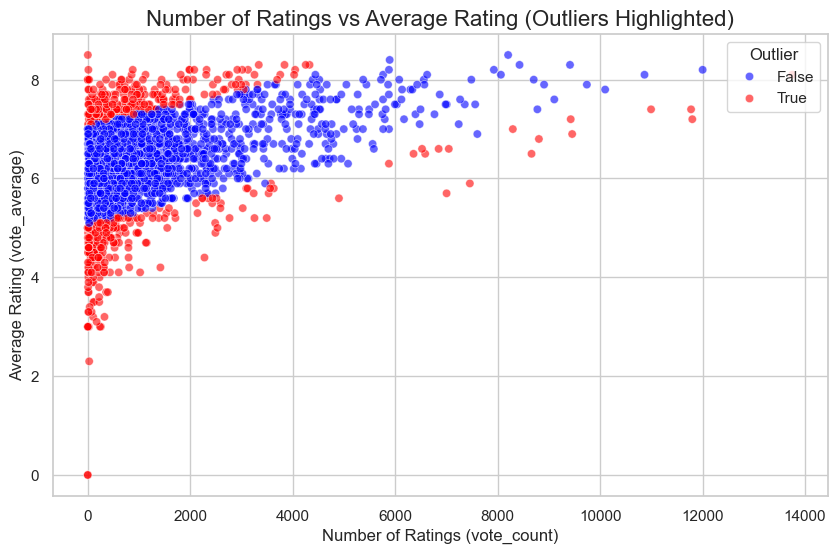

In [24]:
# Add a column to identify outliers
movies_clean_df['is_outlier'] = outliers

# Plot the Number of Ratings vs Average Rating graphic with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=movies_clean_df, 
    x='vote_count', 
    y='vote_average', 
    hue='is_outlier', 
    palette={True: 'red', False: 'blue'}, 
    alpha=0.6
)
plt.title('Number of Ratings vs Average Rating (Outliers Highlighted)', fontsize=16)
plt.xlabel('Number of Ratings (vote_count)')
plt.ylabel('Average Rating (vote_average)')
plt.legend(title='Outlier', loc='upper right')
plt.show()